The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel  =pd.read_csv('data/nobel.csv') #loading nobel data

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country

In [2]:
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print(top_gender,top_country)

Male United States of America


What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa.

   decade  usa_born_winner
0    1900         0.017544
1    1910         0.075000
2    1920         0.074074
3    1930         0.250000
4    1940         0.302326
2000


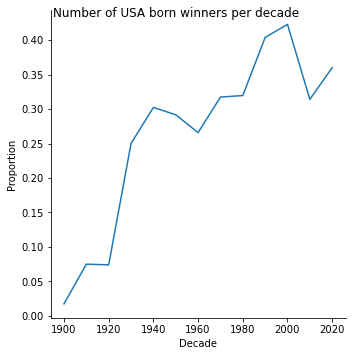

In [33]:
# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10) # find decade
nobel['decade'] = nobel['decade'].astype('Int64') # convert to integer
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()  # find mean/proportion of USA born winners per decade
print(prop_usa_winners.head())

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = nobel['decade'].value_counts().index[0]
print(max_decade_usa2)

# Plotting USA winners
g = sns.relplot(x='decade',y='usa_born_winner',data=prop_usa_winners,kind='line')
g.fig.suptitle('Number of USA born winners per decade')
g.set(xlabel='Decade', ylabel='Proportion')
plt.show()


What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the `value.`

In [22]:
# find female winners and store as True
nobel['female_winner']=np.where(nobel['sex']=='Female',True,False)
print(nobel.head())
    
# Get number of female winners per decade and category
femaleWinners=nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()
print(femaleWinners)

# sort by ascending then take the first row
max_female = femaleWinners.sort_values(['female_winner'],ascending=False)
max_female = max_female[0:1]
print(max_female)

# convert to dictionary
max_female_dict = pd.Series(max_female.decade.values,index=max_female.category).to_dict()
print(max_female_dict)


   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.

In [23]:
# subset for female winners
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(first_woman_name)
print(first_woman_category)


Marie Curie, née Sklodowska
Physics


Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

In [30]:
# find counts all all organisation
all_organisation_counts = nobel['organization_name'].value_counts().rename_axis('organization_name').reset_index(name='count')
# orgs with wins >= 2
max_organisation = all_organisation_counts[all_organisation_counts['count'] >= 2]
#print(max_organisation)

counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index

repeat_list = list(repeats)
print(repeat_list)


['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
